# Redes Neurais Artificiais
 **Nome: João Pedro Miranda Marques**
 
 **Matrícula: 2017050495** 

# Extreme Learning Machine - ELM

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [152]:
# Treinamento de uma rede ELM
def trainELM(xin, yin, nNeurons, par):
    xin = pd.DataFrame(xin)
    yin = pd.DataFrame(yin)
    
    nDimension = xin.shape[1]     # Dimensao de entrada.

    # Adiciona ou não um termo de polarização ao vetor de treinamento w.
    if par == 1:
        xin.insert(nDimension, nDimension, 1)
        # Z<−replicate(p, runif((n+1),−0.5,0.5))
        Z = [np.random.uniform(low=-0.5, high=0.5, size=nDimension+1) for _ in range(nNeurons)]
    else:
        Z = [np.random.uniform(low=-0.5, high=0.5, size=nDimension) for _ in range(nNeurons)]
   
    Z = pd.DataFrame(Z)
    Z = Z.T

    H = np.tanh(xin @ Z)

    W = ( np.linalg.pinv(H) @ yin)    #W<−pseudoinverse(H) %*% yin 

    return [W,H,Z]


In [204]:
# Saída de uma rede ELM
def YELM(xin, Z, W, par):

    xin = pd.DataFrame(xin)
    Z = pd.DataFrame(Z)
    W = pd.DataFrame(W)

    nDimension = xin.shape[1]  # Dimensao de entrada.

    # Adiciona ou não termo de polarização
    if(par == 1):
        xin.insert(nDimension, nDimension, 1)
        # np.c_[ xin, np.ones(xin.shape[0]) ] 

    H = np.tanh(xin @ Z)
    Yhat = np.sign(H @ W)
    
    return Yhat

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


/var/folders/76/q41_l1rj2px1gtbm8fzg0tb00000gn/T/ipykernel_20105/2844048605.py:44: UserWarning: No contour levels were found within the data range.
  plt.contour(seqi, seqj, M, 0)


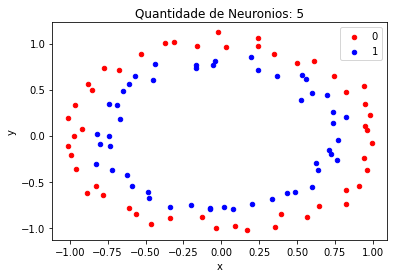

[[0. 0. 0. 1. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 1. 1. 0. 0. 0.]]


/var/folders/76/q41_l1rj2px1gtbm8fzg0tb00000gn/T/ipykernel_20105/2844048605.py:44: UserWarning: No contour levels were found within the data range.
  plt.contour(seqi, seqj, M, 0)


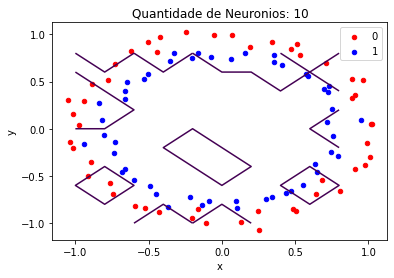

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 1. 0. 1.]]


/var/folders/76/q41_l1rj2px1gtbm8fzg0tb00000gn/T/ipykernel_20105/2844048605.py:44: UserWarning: No contour levels were found within the data range.
  plt.contour(seqi, seqj, M, 0)


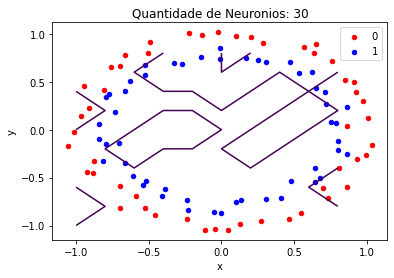

[[0. 0. 1. 0. 1. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


/var/folders/76/q41_l1rj2px1gtbm8fzg0tb00000gn/T/ipykernel_20105/2844048605.py:44: UserWarning: No contour levels were found within the data range.
  plt.contour(seqi, seqj, M, 0)


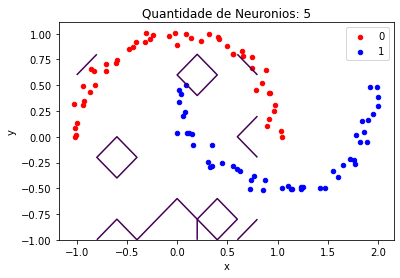

[[0. 1. 1. 0. 1. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 1. 1. 0. 0. 0. 1.]
 [1. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


/var/folders/76/q41_l1rj2px1gtbm8fzg0tb00000gn/T/ipykernel_20105/2844048605.py:44: UserWarning: No contour levels were found within the data range.
  plt.contour(seqi, seqj, M, 0)


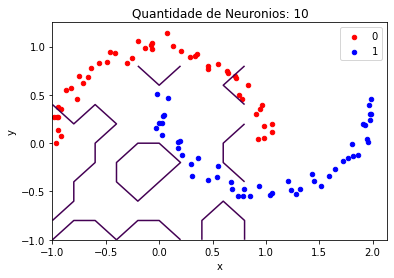

[[0. 0. 1. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 1. 0. 0. 1. 0. 1.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]]


/var/folders/76/q41_l1rj2px1gtbm8fzg0tb00000gn/T/ipykernel_20105/2844048605.py:44: UserWarning: No contour levels were found within the data range.
  plt.contour(seqi, seqj, M, 0)


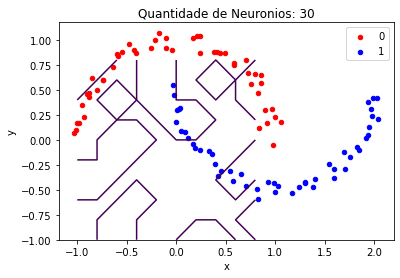

In [213]:

from sklearn.datasets import make_circles, make_moons
from matplotlib import pyplot
from pandas import DataFrame

def plotContour(format, nNeurons):
    if(format == 1):
        X, y = make_circles(n_samples=100, noise=0.05)
    elif(format == 2):
        X, y = make_moons(n_samples=100, noise=0.05)
    # scatter plot, dots colored by class value
    df = DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
    colors = {0:'red', 1:'blue'}
    fig, ax = pyplot.subplots()
    grouped = df.groupby('label')
    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

    retlist = trainELM(X[:,:2], y, nNeurons, 1)

    W = retlist[0]
    H = retlist[1]
    Z = retlist[2]

    yt = YELM(X[:,:2], Z, W, 1)
    yt = pd.DataFrame(yt).to_numpy()

    seqi = np.arange(-1,1,0.2)
    seqj = np.arange(-1,1,0.2)
    M =  np.zeros((len(seqi), len(seqj)))
    ci = 0
    index = 0
    for i in seqi:
        cj=0
        for j in seqj:
            if(yt[index] > 0):
                M[ci][cj] = 0
            else:
                M[ci][cj] = 1
            index += 1
            cj += 1
        ci += 1

    print(M)
    plt.contour(seqi, seqj, M, 0)
    if(nNeurons == 5):
        plt.title('Quantidade de Neuronios: 5')
    elif(nNeurons == 10):
        plt.title('Quantidade de Neuronios: 10')
    elif(nNeurons == 30):
        plt.title('Quantidade de Neuronios: 30')
    plt.show()

plotContour(1,5)
plotContour(1,10)
plotContour(1,30)
plotContour(2,5)
plotContour(2,10)
plotContour(2,30)


In [ ]:
def plotContourAndDots(xin, classes, nNeuronios):
  cores = rainbow(2)
  
  plt.plot(xin[:0], xin[:1], col = cores[classes + 1], xlim = c(-2, 2), ylim = c(-2, 2))
  
  retlist = trainELM(xin, classes, nNeuronios, 1)
  
  W = retlist[0]
  H = retlist[1]
  Z = retlist[2]
  
  Yhat_train = YELM(xin, Z, W, 1)

  print((classes - Yhat_train)**2)
  
  e_train = sum((classes - Yhat_train)**2)
  print(e_train)
  
  seqx1x2 <- seq(-2, 2, 0.1)
  lseq <- length(seqx1x2)
  MZ <- matrix(0, nrow = lseq, ncol = lseq)
  cr <- 0
  
  for (i in 1:lseq) {
    for(j in 1:lseq) {
      cr <- cr + 1
      x1 <- seqx1x2[i]
      x2 <- seqx1x2[j]
      x1x2 <- matrix((cbind(x1, x2)), nrow = 1)
      MZ[i, j] <- YELM(x1x2, Z, W, 1)
    }
  }
  
  par(new = TRUE)
  contour(seqx1x2, seqx1x2, MZ, nlevels = 1, xlim = c(-2, 2), ylim = c(-2, 2))


### Teste - Iris dataset

In [47]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :3]  # we will take the 3 different types
y = iris.target

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

retlist = trainELM(x_train, y_train, 2, 1)

w = retlist[0]
H = retlist[1]
Z = retlist[2]

print(H)

yt = YELM(x_test, Z, w, 1)



[[-0.99613532  0.98270745]
 [-0.99705387  0.98527571]
 [-0.99997104  0.99991908]
 [-0.99248867  0.97071949]
 [-0.9997741   0.9993672 ]
 [-0.99989777  0.9997303 ]
 [-0.98625055  0.94883424]
 [-0.99998688  0.99996421]
 [-0.9860216   0.94606609]
 [-0.99978454  0.99944546]
 [-0.99930354  0.99804864]
 [-0.99995508  0.99988466]
 [-0.99722887  0.98662657]
 [-0.99998969  0.99996852]
 [-0.99983582  0.99953531]
 [-0.99977783  0.99940929]
 [-0.99951846  0.99883414]
 [-0.99372158  0.97242716]
 [-0.99980889  0.99946228]
 [-0.99111553  0.96382765]
 [-0.99997621  0.999931  ]
 [-0.99161941  0.96250433]
 [-0.99974396  0.99918462]
 [-0.99485286  0.97874276]
 [-0.99353538  0.97292045]
 [-0.99282492  0.97214293]
 [-0.99982475  0.99940162]
 [-0.99990601  0.99966698]
 [-0.99363347  0.97375178]
 [-0.99986129  0.99962515]
 [-0.99983026  0.9994588 ]
 [-0.99972993  0.99936151]
 [-0.99918715  0.99745784]
 [-0.99993888  0.99981947]
 [-0.99949515  0.9987083 ]
 [-0.99988904  0.9996334 ]
 [-0.99529147  0.97868168]
 

ValueError: shapes (45, 3) and (4, 2) not aligned